# Question 1

In the Jupyter Notebook, create a section "Question 1". Manually create the causal map exactly as you submitted it to Assignment 1 Part 1 (including +1 -1). Save the map into a file named z666666_map1.csv where 666666 should be your actual zID. Naming files properly will be i mportant for a general analysis later.

In [1]:
import networkx as nx

In [2]:
graph = nx.Graph()

In [3]:
graph.add_edge("Industry","#Jobs",{"direction":1}) #AR1
graph.add_edge("#Jobs","#Citizens",{"direction":1}) #AR2
graph.add_edge("#Citizens","Urbanization",{"direction":1}) #AR3
graph.add_edge("#Citizens","Tax_Revenue",{"direction":1}) #AR4
graph.add_edge("Tax_Revenue","Economical_Growth",{"direction":1}) #AR5
graph.add_edge("Tax_Revenue","School_Cut",{"direction":-1}) #AR6
graph.add_edge("School_Cut","Citizens_Satisfaction",{"direction":-1}) #AR7
graph.add_edge("#Citizens","House_Market",{"direction":1}) #AR8
graph.add_edge("House_Market","House_Prices",{"direction":1}) #AR9
graph.add_edge("House_Prices","Cost_of_Life",{"direction":1}) #AR10
graph.add_edge("Cost_of_Life","Citizens_Satisfaction",{"direction":-1}) #AR11
graph.add_edge("Urbanization","Green_Spaces_Destruction",{"direction":1}) #AR12
graph.add_edge("Green_Spaces_Destruction","Citizens_Satisfaction",{"direction":-1}) #AR13
graph.add_edge("Economical_Growth","Industry",{"direction":1}) #AR14

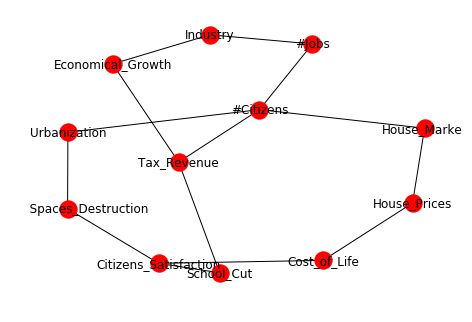

In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
nx.draw(graph,with_labels = True)

In [5]:
for edge in graph.edges():
    print(edge[0],edge[1],graph.edge[edge[0]][edge[1]]['direction'])

Industry #Jobs 1
Industry Economical_Growth 1
#Jobs #Citizens 1
#Citizens Urbanization 1
#Citizens Tax_Revenue 1
#Citizens House_Market 1
Urbanization Green_Spaces_Destruction 1
Tax_Revenue Economical_Growth 1
Tax_Revenue School_Cut -1
School_Cut Citizens_Satisfaction -1
Citizens_Satisfaction Cost_of_Life -1
Citizens_Satisfaction Green_Spaces_Destruction -1
House_Market House_Prices 1
House_Prices Cost_of_Life 1


In [6]:
f=open('z1840898.csv','w')
for edge in graph.edges():
    f.write(edge[0]+','+edge[1]+','+str(graph.edge[edge[0]][edge[1]]['direction'])+'\n')
f.close()

# Question 2

Read the slide deck, slides 1 to 37. You can read the other ones after if you feel like it because you have some curiosity, but they are really not required for the assignment.
As summarized in slide 37, centrality indices can be based on 5 different notions.
* Pick 3 centrality indices, belonging to 3 different notions out of the 5 listed in slide 37.
* Create  a  new  section ("Question  2") of  your  notebook,  and  run  each  of  the  3  centrality  indices  on your causal map. Save the results in the nodes. Use the online docume ntation of networkX to find the function that implements the centrality you picked.
* Visualize  the  network  for  each  of  the  3  centrality  indices,  and  also  show  the  node  labels.  For examples of how to visualize centrality indices: https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html

In [7]:
import operator
closeness=nx.closeness_centrality(graph)
nx.set_node_attributes(graph,'closeness',closeness)
#sorted(nx.get_node_attributes(graph,'closeness').items(),  key=lambda elem:elem[1]) #Show the values

In [8]:
#using the direction as weight
betweenness=nx.betweenness_centrality(graph,weight="direction")
nx.set_node_attributes(graph,'betweenness',betweenness)
#sorted(nx.get_node_attributes(graph,'betweenness').items(), key=lambda elem:elem[1])  #Show the values

In [9]:
katz=nx.katz_centrality(graph)
nx.set_node_attributes(graph,'katz',katz)
#sorted(nx.get_node_attributes(graph,'katz').items(),  key=lambda elem:elem[1])

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
def draw(G,measure_name,position):
    
    #sort the attributes by their value of centrality
    temp=sorted(nx.get_node_attributes(G,measure_name).items(),  key=lambda elem:elem[1])
    
    #as recommended after meeting in the office,I've ranked each element in the list by one,in orded or lower to higher
    #centrality. 
    nodes = nx.draw_networkx_nodes(G, node_size=250, cmap=plt.cm.plasma,pos=position,
                                  nodelist=[x[0] for x in temp],
                                  node_color=list(range(len(temp))) 
                                  #create a list starting from zero up to the total number of elements, 
                                  #each element color will be incremented by one
                                  )

    edges = nx.draw_networkx_edges(G, position)
    labels = nx.draw_networkx_labels(G, position)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

#this was my initial function, the values used for coloring were the returned values from the centrality functions
#it stills shows the elements with the proper color, but as recommended i've switched to the other function to show
#better the ranking of the different elements.
def draw2(G,measure_name,position):
    dpos=nx.spring_layout(G)

    nodes = nx.draw_networkx_nodes(G, node_size=250, cmap=plt.cm.plasma,pos=position,
                                  node_color=list(nx.get_node_attributes(G,measure_name).values()),
                                  nodelist=list(nx.get_node_attributes(G,measure_name).keys())
                                  )
        
    edges = nx.draw_networkx_edges(G, position)
    labels = nx.draw_networkx_labels(G, position)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [12]:
draw(graph,'betweenness',nx.spring_layout(graph))
draw2(graph,'betweenness',nx.spring_layout(graph))

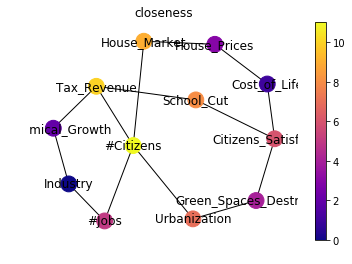

In [13]:
draw(graph,'closeness',nx.spring_layout(graph))
draw2(graph,'closeness',nx.spring_layout(graph))

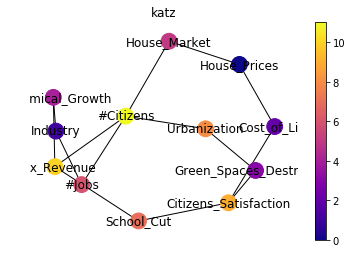

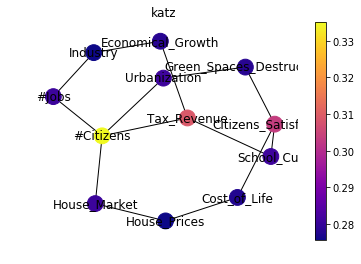

In [14]:
draw(graph,'katz',nx.spring_layout(graph))
draw2(graph,'katz',nx.spring_layout(graph))

In [15]:
#nx.spring_layout(graph)
#import pygraphviz
#from networkx.drawing.nx_agraph import graphviz_layout
#nx.draw_graphviz(graph)
#draw(graph,'degree',graphviz_layout(graph))

# Question 3
Start a new section of your notebook ("Question 3").
For the results from each centrality metric:
* Detail what they mean, based on how that metric works (as explained in the slides).
* Explain whether it makes sense to you given the characteristics of the problem you seek to model. If you see the need for a change in your model, briefly state what you are changing.

## Betweenness centrality
The first graph shows the result obtained by appliying the betweenness centrality algorithm to our graph.
The betweenness centrality quantify the number of shortest paths that pass through the node.

The betweenness centrality calculates the number of shortest paths from every node 'u' to a node 'v' that pass through the node x. The number of nodes that pass through x,divided by the total number of shortest paths from 'u' to 'v' is the number of the betweenness centrality.

In the resulted graph, we have that the node representing the citizens satisfaction, and the Tax revenue have the highest index of all the nodes;
This means that this node has the most control over the network. Having the most control over the network means that most of the times the node will act as a bridge between the communication between two other nodes.

The betweenness centrality is really useful in identifying the most important nodes in systems where there's a transfer of information. Knowing the node with the highest betweeenness centrality allow us to identify the node with the highest access to direct and indirect information.

The nature of our model is different from the normal application of the betweenness centrality metric, and applying this metric to our model, that is not based on transfer of information of any kind, doesn't add any useful information.

## Closeness centrality

The second graph shows the result obtained by appliying the closeness centrality algorithm to our graph.
The closeness centrality metric is used to identify the node with the minimum distance between all the nodes.

The algorighm will calculate the sum of the distance between the current node and every other node in the graph, and return a centrality index that is the value of 1 devided by the previously calculate sum. This means that the lower is the sum af all the travel path, the higher will be our centrality index of the node.
A higher Closeness centrality index, means that the node is 'closer' in distance to all the other nodes inside the graph.

Applying this algorighm to our graph shows that the most central node of our graph is the number of citizens, followed by the tax revenue. 

Being the nature of our problem, not dependant on the location of a node, so not dependant from the distance between a node 'u' and a node 'v',and being the time necessary to travel between two nodes not relevant, knowing the node with the highest closeness centrality index doesn't add useful information to our model.

# Katz centrality

The third graph shows the result obtained by applying the katz centrality algorithm to our graph. The katz centrality metric is calculated using the value of the immediate neighbors plus all the node that connect to it through those neighboors.
The difference of the katz centrality is that distant connections, so connections that are not direct connections, get penalized by an attenuation factor \alpha. 
* For small values of \alpha the contribution path decreases rapidly.
* For large values of \alpha the contribution path decrease smoothly.
This helps to add more value to the information as close as it's to the source.

In our model, we can see that the number of citizens is the central value.The metric has been calculated using the default value for the attenuation factor alpha=0.1. This means that the contribution path for the nodes not directly connected decrease rapidly.

Katz centrality results useful when there's a feedback between nodes, In a social network for example an information will be considered with a higher value, the closer it's from the source. The further in the path the information comes from, the less value it will have.

Analyzing the result of the metric, will tell us that the major point of our model is the number of citizens. This means that the model in his current status shows that allowing the company to build in indistry in the city, is going to affect first of all the number of citizens in the city, with a smaller impact on tax revenue and citizen satisfaction. I'll need to perform some changes to make it possible for my model to focus on the economical growth of the city.

# Question 4
Write the code to save your new map as z666666_map2.csv
Making a "new map" requires having analyzed the previous one thoroughly. Question 4 only gets counted if question 3 is done.

# Changes to make

I've changed some of the names of the nodes, to remove the possible double negation when decreasing a negavive quantity.
Also I have inserted some loops that I had previously not inserted.

In [16]:
graph2 = nx.Graph()
graph2.add_edge("#Industry","#Jobs",{"direction":1}) #AR1
graph2.add_edge("#Jobs","#Citizens",{"direction":1}) #AR2
graph2.add_edge("#Citizens","Urbanization",{"direction":1}) #AR3
graph2.add_edge("#Citizens","Tax_Revenue",{"direction":1}) #AR4
graph2.add_edge("Tax_Revenue","Economical_Growth",{"direction":1}) #AR5
graph2.add_edge("Tax_Revenue","School_Funding",{"direction":+1}) #AR6
graph2.add_edge("School_Funding","Citizens_Satisfaction",{"direction":+1}) #AR7
graph2.add_edge("#Citizens","House_Market",{"direction":1}) #AR8
graph2.add_edge("House_Market","House_Prices",{"direction":1}) #AR9
graph2.add_edge("House_Prices","Cost_of_Life",{"direction":1}) #AR10
graph2.add_edge("Cost_of_Life","Citizens_Satisfaction",{"direction":-1}) #AR11
graph2.add_edge("Urbanization","Green_Spaces",{"direction":-1}) #AR12
graph2.add_edge("Green_Spaces","Citizens_Satisfaction",{"direction":1}) #AR13
graph2.add_edge("Economical_Growth","#Industry",{"direction":1}) #AR14
#additional edges and nodes included
graph2.add_edge("#Industry","Urbanization",{"direction":1})  #more industries means more urbanized city
graph2.add_edge("School_Funding","Tax_Revenue",{"direction":-1})  #Increased school funding, means more jobs/research position so more tax revenue
graph2.add_edge("Economical_Growth","#Jobs",{"direction":1})    #the more the economy is developed in a city, the more jobs it's gonna offer for the citizens
graph2.add_edge("Urbanization","#Public_Services",{"direction":1})  #Urbanization bring with it the need of new hospitals, police department, firefighter etc
graph2.add_edge("#Public_Services","#Jobs",{"direction":1})  #the more public service structures, the more jobs will be available
graph2.add_edge("Citizens_Satisfaction","Work_Productivity",{"direction":1})   #A happy and satisfied citizen will be more productive at work
graph2.add_edge("Work_Productivity","Economical_Growth",{"direction":1})      #A more productive worker will perform more work in the same time, bringing 
graph2.add_edge("Economical_Growth","Income_Inequality",{"direction":1})      #An economical growth of the city will increase the Income inequality between cityizens
graph2.add_edge("Income_Inequality","Citizens_Satisfaction",{"direction":-1})   #Income Inequality will decrease the citizens satisfaction

Recalculating the katz centrality on the new nodes to see how the changes affect our graph.
Changes were necessary because the old graph had developed more the side of the map where the addition of industries in the city would increase the number of citizens in the city and that would be the catalyst of everything.
In the second map I've developed further the concept of "what it means to have economical growth", and what it causes to the model. This helped me to balance the level of detail and accuracy in the whole graph.

In [17]:
katz2=nx.katz_centrality(graph2)
nx.set_node_attributes(graph2,'katz2',katz2)
#sorted(nx.get_node_attributes(graph2,'katz2').items(), key=lambda elem:elem[1])

## Changes

After adding some edges to the map, and some other nodes, the node ecomonical growth shows up as the node with the highest katz centrality. This is what we wanted to from our model

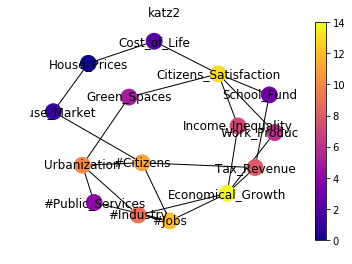

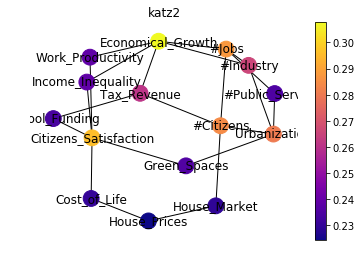

In [18]:
draw(graph2,'katz2',nx.spring_layout(graph2))
draw2(graph2,'katz2',nx.spring_layout(graph2))

In [19]:
for edge in graph2.edges():
    print(edge[0],edge[1],graph2.edge[edge[0]][edge[1]]['direction'])

#Industry #Jobs 1
#Industry Economical_Growth 1
#Industry Urbanization 1
#Jobs #Citizens 1
#Jobs Economical_Growth 1
#Jobs #Public_Services 1
#Citizens Urbanization 1
#Citizens Tax_Revenue 1
#Citizens House_Market 1
Urbanization Green_Spaces -1
Urbanization #Public_Services 1
Tax_Revenue Economical_Growth 1
Tax_Revenue School_Funding -1
Economical_Growth Work_Productivity 1
Economical_Growth Income_Inequality 1
School_Funding Citizens_Satisfaction 1
Citizens_Satisfaction Cost_of_Life -1
Citizens_Satisfaction Green_Spaces 1
Citizens_Satisfaction Work_Productivity 1
Citizens_Satisfaction Income_Inequality -1
House_Market House_Prices 1
House_Prices Cost_of_Life 1


In [20]:
f=open('z1840898_map2.csv','w')
for edge in graph2.edges():
    f.write(edge[0]+','+edge[1]+','+str(graph2.edge[edge[0]][edge[1]]['direction'])+'\n')
f.close()